<a href="https://colab.research.google.com/github/Fayjul/Machine-Learning/blob/master/image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dependencies

In [25]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [26]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [28]:
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

In [30]:
y_train = y_train.reshape(-1,)

In [31]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [32]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [33]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

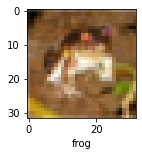

In [34]:
plot_sample(X_train, y_train, 0)

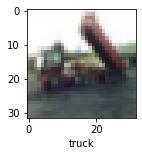

In [35]:
plot_sample(X_train, y_train, 2)

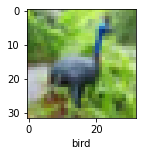

In [36]:
plot_sample(X_train, y_train, 6)

In [37]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.8126 - accuracy: 0.3526
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6247 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.5418 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4820 - accuracy: 0.4771
Epoch 5/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4322 - accuracy: 0.4949


In [40]:
y_test = y_test.reshape(-1,)

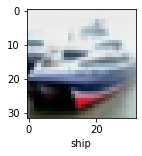

In [41]:
#X_test[0]
plot_sample(X_test, y_test, 1)

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.78      0.50      1000
           1       0.70      0.40      0.51      1000
           2       0.37      0.34      0.36      1000
           3       0.38      0.31      0.34      1000
           4       0.59      0.21      0.31      1000
           5       0.50      0.27      0.35      1000
           6       0.40      0.77      0.53      1000
           7       0.60      0.53      0.56      1000
           8       0.78      0.29      0.42      1000
           9       0.44      0.69      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.44     10000
weighted avg       0.51      0.46      0.44     10000



In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.4572 - accuracy: 0.4795
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1038 - accuracy: 0.6123
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9732 - accuracy: 0.6599
Epoch 4/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8873 - accuracy: 0.6911
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8147 - accuracy: 0.7189
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7581 - accuracy: 0.7359
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7016 - accuracy: 0.7553
Epoch 8/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.6556 - accuracy: 0.7686
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6102 - accuracy: 0.7861
Epoch 10/10
1563/1563 [==============================] - 68s 44m

In [46]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.9259 - accuracy: 0.7009


[0.92592453956604, 0.7009000182151794]

In [47]:
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[2.9598153e-04, 4.0868686e-05, 6.9397167e-05, 9.8852879e-01,
        1.6167772e-07, 1.0662379e-02, 1.2163124e-04, 3.1263560e-05,
        2.0982188e-04, 3.9795803e-05],
       [5.8954186e-04, 4.5828745e-04, 6.0543516e-07, 3.2512954e-08,
        4.6472698e-10, 2.4600224e-12, 4.0658851e-11, 3.2167496e-10,
        9.9887484e-01, 7.6695724e-05],
       [3.9025733e-01, 4.4113991e-01, 7.5906692e-03, 4.8545431e-03,
        2.8179892e-04, 9.4135772e-05, 7.1195442e-05, 3.7912125e-04,
        9.7836964e-02, 5.7494335e-02],
       [9.5004976e-01, 1.8426452e-03, 2.1085344e-02, 1.3300781e-03,
        1.8604369e-04, 6.4342667e-06, 9.0825849e-04, 2.4229617e-04,
        2.4052436e-02, 2.9663596e-04],
       [4.3935790e-07, 1.8980496e-05, 2.4012413e-03, 1.0705823e-02,
        9.1502410e-01, 7.1421964e-04, 7.0999250e-02, 1.2043684e-04,
        2.1519959e-06, 1.3349087e-05]], dtype=float32)

In [48]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [49]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

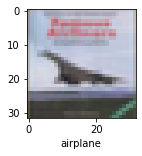

In [50]:
plot_sample(X_test, y_test,3)


In [51]:
classes[y_classes[3]]

'airplane'